<a href="https://colab.research.google.com/github/riddhikaa/csir_npl_work/blob/main/Highly_Expressed_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [25]:
file_path = '/content/drive/MyDrive/breastcancer_data/original_Breast_GSE70947.xlsx'
df = pd.read_excel(file_path)


In [26]:
df.head()

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,NM_207327,NM_001004477,NM_020700,NM_005895,NM_000679,NR_003529,NR_036446,NM_001001957,lincRNA:chr7:29652000-29661000_R,ENST00000494108
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,normal,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,10.453202,4.376090,5.597596,11.860087,11.321528,4.486530,5.489959,5.810069,4.834056,4.383929
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,normal,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,10.066372,4.383785,5.404546,11.636828,8.283747,4.770318,5.345571,4.457930,4.441395,4.411587
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,normal,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,10.380676,4.428892,5.356374,12.031338,9.420630,4.394069,5.851030,4.508072,4.568262,4.316081
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,normal,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,10.509871,4.381542,5.757179,11.944607,10.311339,4.451118,6.117379,4.505663,4.413361,4.537626
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,normal,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,10.552841,4.386116,6.851058,11.976510,10.904219,4.432566,6.286439,4.540453,4.412933,4.452250


In [27]:
target = "type"
val_counts = df[target].value_counts()
print(val_counts, "\n\n")

type
normal                   146
breast_adenocarcinoma    143
Name: count, dtype: int64 




In [28]:
print("these are the genes :\n",df.columns)
labels=[]
for i in df.columns:
  labels.append(i)

labels.remove('samples') # removing sample label

these are the genes :
 Index(['samples', 'type', 'NM_144987', 'NM_013290', 'ENST00000322831',
       'NM_001625', 'lincRNA:chr7:226042-232442_R', 'NM_032391',
       'ENST00000238571', 'XR_108906',
       ...
       'NM_207327', 'NM_001004477', 'NM_020700', 'NM_005895', 'NM_000679',
       'NR_003529', 'NR_036446', 'NM_001001957',
       'lincRNA:chr7:29652000-29661000_R', 'ENST00000494108'],
      dtype='object', length=16384)


In [29]:
labels

['type',
 'NM_144987',
 'NM_013290',
 'ENST00000322831',
 'NM_001625',
 'lincRNA:chr7:226042-232442_R',
 'NM_032391',
 'ENST00000238571',
 'XR_108906',
 'NM_005937',
 'NM_152493',
 'lincRNA:chr8:104254399-104295074_F',
 'NM_014736',
 'ENST00000414816',
 'NM_017871',
 'NR_028328',
 'NM_000266',
 'NM_182501',
 'NM_174905',
 'ERCC-00071_128',
 'ERCC-00142_99',
 'NM_138783',
 'NM_002610',
 'NM_001916',
 'NM_002196',
 'NM_015411',
 'NM_138330',
 'NM_003725',
 'NM_021804',
 'NM_015326',
 'NM_020974',
 'NM_001005515',
 'NM_001014811',
 'NR_015421',
 'NM_033143',
 'lincRNA:chr8:145986196-145991421_F',
 'NM_176819',
 'NM_006472',
 'lincRNA:chrX:65009725-65085200_R',
 'lincRNA:chr5:124738151-124748189_F',
 'NM_003314',
 'NM_181515',
 'XR_110033',
 'NM_001004453',
 'NM_024074',
 'NM_152778',
 'NM_144670',
 'NM_198468',
 'XR_132725',
 'NM_213653',
 'A_33_P3344521',
 'NM_032553',
 'lincRNA:chr8:101925424-101930749_R',
 'ERCC-00134_68',
 'BC037261',
 'NR_034089',
 'AJ298317',
 'NM_002466',
 'XM_0031

In [30]:
!pip install category_encoders==2.6.0
import category_encoders

In [31]:
# Encoding categorical features (Ordinal Encoding)

class_map = {"normal": 0, "breast_adenocarcinoma": 1}
class_map_reverse = {m : n for m, n in zip(class_map.values(), class_map.keys())}

encoder = category_encoders.OrdinalEncoder(cols = [target], mapping = [{"col": target, "mapping": class_map}])
df['type'] = encoder.fit_transform(df[target])

In [32]:
X = df.drop(columns=df.columns[0]).values
y = df[target].values

print(X.shape, y.shape)
print(X)

(289, 16383) (289,)
[[0.         8.69331779 7.71801596 ... 5.81006943 4.83405623 4.38392868]
 [0.         9.37597965 7.07223164 ... 4.45792972 4.44139474 4.41158681]
 [0.         8.94344176 7.96457276 ... 4.50807186 4.56826205 4.31608095]
 ...
 [1.         9.0513847  7.65189288 ... 4.41435052 4.52880797 4.39442035]
 [1.         8.11460641 8.09668189 ... 6.15655541 4.38106974 4.44705215]
 [1.         8.82757478 7.53889842 ... 4.63430652 4.45075149 4.38308807]]


In [91]:
normal_samples = df[df['type'] == 0]
cancerous_samples = df[df['type'] == 1]

# Calculating mean expression for each gene, excluding the 'type' column
normal_mean_expression = normal_samples[labels].mean(axis=0)
cancerous_mean_expression = cancerous_samples[labels].mean(axis=0)

#highly expressed genes in both groups
top_n = 3750 #top 10,000--> 5000 cancerous and 5000 normal
top_genes_normal = normal_mean_expression.nlargest(top_n)
top_genes_cancerous = cancerous_mean_expression.nlargest(top_n)

print("Top highly expressed genes in normal samples:")
print(top_genes_normal)
print('\n')
print("Top highly expressed genes in cancerous samples:")
print(top_genes_cancerous)

Top highly expressed genes in normal samples:
NM_001195605       18.172377
NM_001033045       17.850794
NM_000518          17.671507
ENST00000361789    17.669676
NM_000150          17.584685
                     ...    
NM_001284           9.508745
NM_213622           9.508425
NM_004292           9.508181
NM_006915           9.507530
NM_213566           9.507498
Length: 3750, dtype: float64


Top highly expressed genes in cancerous samples:
NM_001195605       18.305861
NM_001033045       17.980294
NM_000150          17.724888
ENST00000361789    17.463887
NM_001035267       17.463603
                     ...    
NM_000380           9.492140
NM_018428           9.490993
NM_014884           9.488896
NM_032970           9.488455
NM_006767           9.485907
Length: 3750, dtype: float64


In [92]:
# df to set
top_genes_normal_set = set(top_genes_normal.index)
top_genes_cancerous_set = set(top_genes_cancerous.index)


# unique genes in normal and cancerous samples
unique_to_normal = top_genes_normal_set - top_genes_cancerous_set
unique_to_cancerous = top_genes_cancerous_set - top_genes_normal_set

print("Genes uniquely highly expressed in normal samples:")
print(unique_to_normal)
print('\n')
print("Genes uniquely highly expressed in cancerous samples:")
print(unique_to_cancerous)

Genes uniquely highly expressed in normal samples:
{'NM_014368', 'NM_000779', 'NM_030954', 'NM_031448', 'NM_001330', 'NM_004850', 'NM_016602', 'NM_000679', 'NM_005007', 'NM_144582', 'NM_001099744', 'NM_000019', 'NM_005424', 'NM_003198', 'NM_005966', 'NM_147162', 'NM_001080463', 'NM_007006', 'XM_003403534', 'NM_018943', 'NM_198159', 'DCP_22_0', 'NM_002317', 'ENST00000485253', 'ENST00000481710', 'NR_028502', 'NM_145273', 'NM_138445', 'NM_000820', 'NM_002005', 'NM_001242462', 'NM_016308', 'NM_001011657', 'NM_005139', 'NM_012323', 'NM_001014975', 'NM_004944', 'NM_006521', 'NR_015451', 'NM_006788', 'NM_014899', 'NM_001004356', 'NM_001136103', 'NR_002229', 'NM_005354', 'NM_000559', 'NM_001063', 'NM_001001132', 'NM_000016', 'NM_001097579', 'NR_026836', 'NM_206898', 'NM_018059', 'NR_029392', 'NM_000049', 'NM_021155', 'NM_032998', 'NM_001051', 'NM_206962', 'NM_001284', 'NM_001495', 'NM_020365', 'NM_003995', 'NM_001164440', 'NM_030648', 'NM_014171', 'NM_014992', 'NM_022746', 'NM_053045', 'NM_025

In [93]:
# converting set to list
unique_to_normal_list = list(unique_to_normal)
unique_to_cancerous_list = list(unique_to_cancerous)

In [94]:
unique_to_cancerous_list=unique_to_cancerous_list+['type']
unique_to_normal_list=unique_to_normal_list+['type']

In [95]:
Cancer_Gene_Expression = df[unique_to_cancerous_list]
Normal_Gene_Expression = df[unique_to_normal_list]

In [96]:
df

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,NM_207327,NM_001004477,NM_020700,NM_005895,NM_000679,NR_003529,NR_036446,NM_001001957,lincRNA:chr7:29652000-29661000_R,ENST00000494108
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,0,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,10.453202,4.376090,5.597596,11.860087,11.321528,4.486530,5.489959,5.810069,4.834056,4.383929
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,0,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,10.066372,4.383785,5.404546,11.636828,8.283747,4.770318,5.345571,4.457930,4.441395,4.411587
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,0,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,10.380676,4.428892,5.356374,12.031338,9.420630,4.394069,5.851030,4.508072,4.568262,4.316081
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,0,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,10.509871,4.381542,5.757179,11.944607,10.311339,4.451118,6.117379,4.505663,4.413361,4.537626
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,0,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,10.552841,4.386116,6.851058,11.976510,10.904219,4.432566,6.286439,4.540453,4.412933,4.452250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,GSM1823993_252800416912_S01_GE1_107_Sep09_1_2,1,9.039173,8.468509,6.879635,11.937228,9.186126,4.973253,5.511133,4.700752,...,10.203885,4.397329,7.242319,12.164108,4.407815,4.516565,5.773197,4.329701,4.402363,4.432176
285,GSM1823994_252800416913_S01_GE1_107_Sep09_2_2,1,8.667838,8.628998,6.938719,11.311638,10.373623,5.130424,6.128423,4.904184,...,10.504524,4.483031,6.035668,11.618588,7.724235,4.517905,6.158898,4.379794,4.508619,4.354127
286,GSM1823995_252800416913_S01_GE1_107_Sep09_1_2,1,9.051385,7.651893,5.845620,11.735257,9.944673,4.941364,5.762996,4.615398,...,10.339298,4.547199,5.526768,11.362300,9.852802,4.388090,6.092398,4.414351,4.528808,4.394420
287,GSM1823996_252800416912_S01_GE1_107_Sep09_2_2,1,8.114606,8.096682,6.355387,11.556090,9.759141,5.151897,5.898118,5.594455,...,9.818947,4.548501,7.901170,11.737772,4.475062,4.789901,6.148365,6.156555,4.381070,4.447052


In [97]:
Cancer_Gene_Expression

,NM_002814,NM_021052,NM_030665,NM_001142595,NM_000663,ENST00000527620,NM_000449,NM_017423,NM_006726,NM_000493,...,NM_198046,NM_182905,NM_207351,NM_020770,NM_175623,NM_139266,NM_004935,lincRNA:chr6:42725472-42759772_F,NM_002160,type
0,9.426882,8.157016,9.218016,9.663021,8.779632,6.235130,9.052218,8.812271,9.209088,7.274056,...,9.201738,9.215948,8.507006,7.011374,8.405923,8.255637,9.065217,8.868495,7.092183,0
1,9.428860,7.994585,8.620463,9.313662,10.202052,7.434671,9.961714,9.577503,9.013635,7.664013,...,9.202737,9.065954,8.508767,6.846390,8.764161,9.942230,10.088226,9.379398,8.411771,0
2,9.528871,8.382838,9.164946,8.667140,9.023564,5.435741,9.359953,8.578661,9.145370,7.789625,...,8.935709,9.256947,8.879704,4.880025,8.563832,8.523312,8.913025,8.752083,7.107684,0
3,9.371384,7.705064,8.616650,8.990227,9.074753,5.970266,8.807000,8.562554,9.546266,5.970266,...,8.993693,8.907141,8.701472,7.720340,8.798435,8.574720,8.495884,9.343352,8.469314,0
4,9.246052,8.237349,9.426792,9.476275,10.079634,8.443554,8.853003,11.287047,10.121282,6.410020,...,9.542415,9.057449,9.068534,11.062514,9.827935,8.229872,8.297623,9.555610,8.096335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,10.369528,13.198975,10.287309,8.304989,10.145454,10.237190,9.387982,10.878424,12.011392,10.486939,...,10.453824,9.837943,10.445109,12.630288,11.040873,10.572733,11.145240,10.400498,8.762501,1
285,9.561395,9.794716,10.210350,8.771831,11.273633,12.048696,10.291785,10.846010,10.147414,11.481101,...,10.278966,9.564266,10.926664,12.070991,10.464915,11.331818,10.297415,10.086433,10.186874,1
286,9.242560,7.301776,9.706857,9.291650,9.024062,7.879301,9.544324,9.152271,9.038311,8.460835,...,9.644369,9.890835,9.210352,8.690557,8.741164,9.653814,9.592385,9.975662,9.837354,1
287,10.017550,12.017743,10.375264,9.556983,10.798244,10.178785,10.609764,10.935264,10.207460,12.945767,...,10.198533,9.805299,10.500153,12.420601,11.307064,11.702404,10.516187,9.231433,9.409775,1


In [98]:
Normal_Gene_Expression

,NM_014368,NM_000779,NM_030954,NM_031448,NM_001330,NM_004850,NM_016602,NM_000679,NM_005007,NM_144582,...,NM_001001551,NM_002409,NM_014867,NR_002817,NM_015296,NM_002906,NR_033690,NM_025059,NM_001626,type
0,10.781811,10.425740,9.344616,10.192822,9.734550,9.667930,10.066865,11.321528,9.496050,9.700339,...,10.044344,9.989613,11.221055,11.404058,10.072828,9.834001,11.021096,9.374831,10.124563,0
1,9.335388,8.420638,9.166291,9.523603,8.599472,8.874149,9.065954,8.283747,9.075541,9.706062,...,10.812877,8.923720,8.306810,9.156123,9.548933,9.515787,9.140973,9.608009,9.754073,0
2,11.249822,10.918556,9.380458,10.637682,10.621031,9.925548,9.689229,9.420630,9.577503,9.784522,...,10.838370,10.283795,10.373070,11.840499,9.712717,10.020460,11.951271,10.545647,10.566781,0
3,9.352257,12.087790,9.775252,10.748875,9.879762,9.847709,9.234889,10.311339,9.541843,9.818228,...,10.477473,9.809359,10.439933,11.997093,10.137100,10.176462,12.310027,9.941901,9.329377,0
4,10.024070,10.150668,9.581666,10.426605,9.625065,8.882288,9.953028,10.904219,9.409849,9.314986,...,10.087309,9.050866,10.084057,11.418113,9.821581,9.449895,11.141401,10.077319,9.770969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,8.813073,6.296644,9.999240,8.512592,8.708462,8.393066,9.598456,4.407815,9.467016,9.535485,...,8.927759,7.720340,9.510792,6.041819,9.415852,8.219698,8.351083,9.565357,10.040471,1
285,9.415935,7.523505,9.188279,8.924633,9.678637,7.877230,9.117146,7.724235,8.999411,9.337487,...,9.313455,9.186437,8.572958,9.757147,9.281457,8.517106,9.628225,9.366593,9.399181,1
286,10.151769,8.178469,8.961123,9.641717,10.210350,9.327629,10.621454,9.852802,9.757990,9.909278,...,9.897214,9.698864,10.322556,11.439258,9.748525,9.736900,10.832800,9.630578,10.651779,1
287,7.400213,7.531719,9.701609,8.029224,8.634334,7.568586,7.668854,4.475062,9.457787,8.929824,...,9.073790,5.853758,6.416441,6.713638,9.555782,8.043953,7.565038,10.181371,8.023429,1


In [99]:
target = "type"
val_counts = Cancer_Gene_Expression[target].value_counts()
print(val_counts, "\n\n")


type
0    146
1    143
Name: count, dtype: int64 




In [100]:
Cancer_Gene_Expression.head()
print(f"Total duplicates: {Cancer_Gene_Expression.duplicated().sum()}") #checking for duplicates
#checking for null values
print(Cancer_Gene_Expression.isna().sum())
print(f"Total null count: {Cancer_Gene_Expression.isna().sum().sum()}")

Total duplicates: 0
NM_002814                           0
NM_021052                           0
NM_030665                           0
NM_001142595                        0
NM_000663                           0
                                   ..
NM_139266                           0
NM_004935                           0
lincRNA:chr6:42725472-42759772_F    0
NM_002160                           0
type                                0
Length: 321, dtype: int64
Total null count: 0


In [101]:
X = Cancer_Gene_Expression.drop(columns=Cancer_Gene_Expression.columns[-1]).values
y = Cancer_Gene_Expression[target].values

print(X.shape, y.shape)
print(X)


(289, 320) (289,)
[[ 9.42688188  8.15701624  9.21801607 ...  9.06521717  8.86849548
   7.09218257]
 [ 9.42885973  7.99458532  8.62046296 ... 10.08822591  9.37939762
   8.4117705 ]
 [ 9.52887071  8.38283768  9.16494625 ...  8.91302464  8.7520826
   7.10768379]
 ...
 [ 9.24255963  7.30177573  9.70685696 ...  9.59238526  9.97566225
   9.83735428]
 [10.01754969 12.01774289 10.37526378 ... 10.51618709  9.23143309
   9.40977529]
 [ 9.72145217  9.03526474 10.55663755 ...  9.72956552 10.306272
  10.15894282]]


In [102]:
from sklearn import linear_model, svm, model_selection,preprocessing, base, metrics
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [103]:
# SPLITTIG 70 30
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print(X_train.shape, X_test.shape)


(202, 320) (87, 320)


In [104]:
#(Z-Score Normalization)

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

print(X_train[0].mean(), X_train[0].std())

-0.29444347893982137 0.7119319509252017


In [105]:
# Handling class imbalance through Synthetic Minority Over-sampling Technique (SMOTE)
smote = imblearn.over_sampling.SMOTE(random_state = 3, k_neighbors = 3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(X_train_resampled.shape, y_train_resampled.shape)

(204, 320) (204,)


In [106]:
X_train, y_train = X_train_resampled.copy(), y_train_resampled.copy()

In [107]:
# svm algo

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC


svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

print(svm_model.score(X_train, y_train))
print(svm_model.score(X_test, y_test))


0.9215686274509803
0.896551724137931


Training Accuracy of SVM model: 0.92
Training F1 score of SVM model: 0.92
Testing Accuracy of SVM model: 0.90
Testing F1 score of SVM model: 0.89


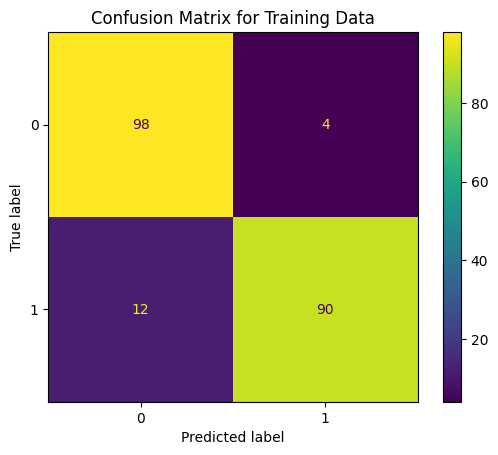

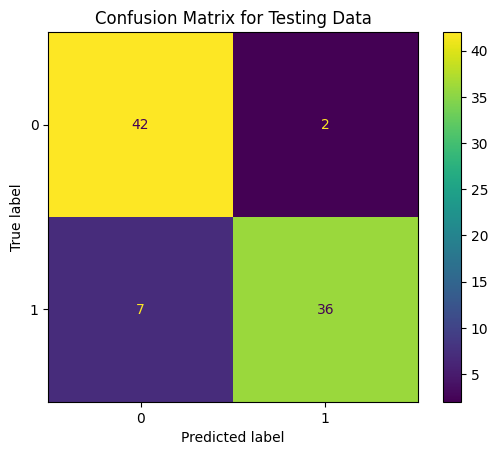

In [108]:
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Evaluation on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training Accuracy of SVM model: {train_accuracy:.2f}")
print(f"Training F1 score of SVM model: {train_f1:.2f}")

# Evaluation on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Testing Accuracy of SVM model: {test_accuracy:.2f}")
print(f"Testing F1 score of SVM model: {test_f1:.2f}")

# Confusion matrix for training data
train_cm = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(train_cm, display_labels=svm_model.classes_).plot()
plt.title('Confusion Matrix for Training Data')
plt.show()
print('\n')
# Confusion matrix for testing data
test_cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(test_cm, display_labels=svm_model.classes_).plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()